Training Set Accuracy: 99.68%
Test Set Accuracy: 31.11%


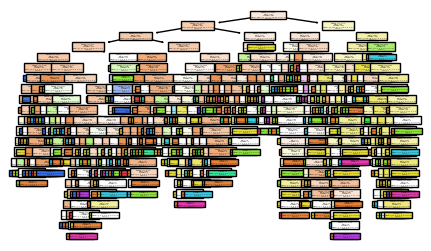

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree

df = pd.read_excel('embeddingsdata.xlsx')
Tr_X,Te_X, Tr_y, Te_y = train_test_split(df[['embed_264', 'embed_265']], df['Label'], test_size=0.3, random_state=42)

ml_model = DecisionTreeClassifier()
model = ml_model.fit(Tr_X, Tr_y)

train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)
print(f"Training Set Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Set Accuracy: {test_accuracy * 100:.2f}%")
plt.figure(figsize=(5,3))
plot_tree(model, filled=True, feature_names=['embed_100', 'embed_101'], class_names=class_names)
plt.show()

Training Set Accuracy (with max_depth=5): 54.29%
Test Set Accuracy (with max_depth=5): 45.56%


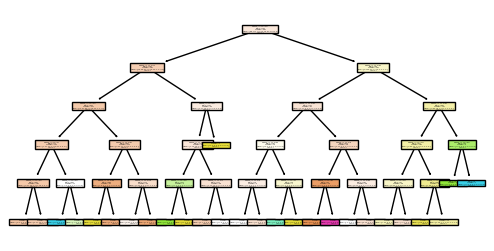

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


df = pd.read_excel('embeddingsdata.xlsx')
Tr_X,Te_X, Tr_y, Te_y = train_test_split(df[['embed_264', 'embed_265']], df['Label'], test_size=0.3, random_state=42)

ml_model = DecisionTreeClassifier(max_depth=5)
model = ml_model.fit(Tr_X, Tr_y)

train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)
print(f"Training Set Accuracy (with max_depth=5): {train_accuracy * 100:.2f}%")
print(f"Test Set Accuracy (with max_depth=5): {test_accuracy * 100:.2f}%")

plt.figure(figsize=(6,3))
plot_tree(model, filled=True, feature_names=['embed_100', 'embed_101'], class_names=class_names)
plt.show()

Training Set Accuracy (with entropy): 51.75%
Test Set Accuracy (with entropy): 41.48%


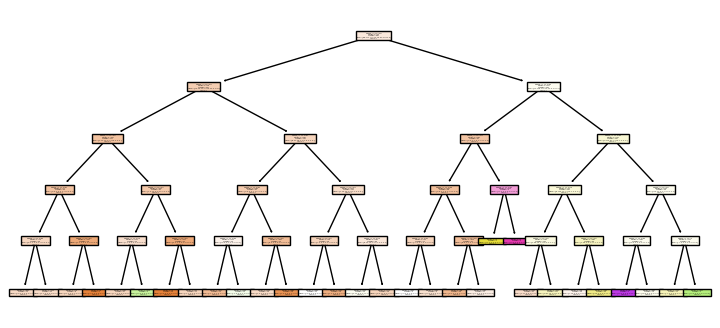

In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_excel('embeddingsdata.xlsx')
Tr_X,Te_X, Tr_y, Te_y = train_test_split(df[['embed_264', 'embed_265']], df['Label'], test_size=0.3, random_state=42)


ml_model = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model = ml_model.fit(Tr_X, Tr_y)

train_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)
print(f"Training Set Accuracy (with entropy): {train_accuracy * 100:.2f}%")
print(f"Test Set Accuracy (with entropy): {test_accuracy * 100:.2f}%")

plt.figure(figsize=(9,4))
plot_tree(model, filled=True, feature_names=['embed_100', 'embed_101'], class_names=class_names)
plt.show()

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


df = pd.read_excel('embeddingsdata.xlsx')
binary_df = df[df['Label'].isin([0, 1])]
X = binary_df[['embed_100', 'embed_101']]
y = binary_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)

y_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_dt)
confusion_matrix_dt = confusion_matrix(y_test, y_dt)
classification_report_dt = classification_report(y_test, y_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", confusion_matrix_dt)
print("Decision Tree Classification Report:\n", classification_report_dt)

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)

y_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_rf)
confusion_matrix_rf = confusion_matrix(y_test, y_rf)
classification_report_rf = classification_report(y_test, y_rf)

print("\nRandom Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", confusion_matrix_rf)
print("Random Forest Classification Report:\n", classification_report_rf)

Decision Tree Accuracy: 0.6010928961748634
Decision Tree Confusion Matrix:
 [[75 32]
 [41 35]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.70      0.67       107
           1       0.52      0.46      0.49        76

    accuracy                           0.60       183
   macro avg       0.58      0.58      0.58       183
weighted avg       0.59      0.60      0.60       183


Random Forest Accuracy: 0.5846994535519126
Random Forest Confusion Matrix:
 [[94 13]
 [63 13]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.88      0.71       107
           1       0.50      0.17      0.25        76

    accuracy                           0.58       183
   macro avg       0.55      0.52      0.48       183
weighted avg       0.56      0.58      0.52       183

